In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = df[["Open","High","Low","Close","Volume"]]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [ ]:
print(scaled_df.head())

                Open      High       Low     Close    Volume
Date                                                        
2018-02-05  0.061253  0.038304  0.041331  0.044516  0.186150
2018-02-06  0.030059  0.035640  0.030273  0.069548  0.198264
2018-02-07  0.071243  0.048408  0.072770  0.067015  0.135690
2018-02-08  0.072334  0.037683  0.041265  0.035430  0.141320
2018-02-09  0.043474  0.011436  0.010729  0.034053  0.272902


In [ ]:
total_data = len(scaled_df)

In [ ]:
train_size = int(total_data*0.8)

In [ ]:
train_data = scaled_df[:train_size]
test_data = scaled_df[train_size:]

In [ ]:
print("Train size : ", len(train_data))
print("Test size : ", len(test_data))

Train size :  807
Test size :  202


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
x_train = train_data.drop('Close', axis=1)
y_train = train_data['Close']
x_test = test_data.drop('Close', axis=1)
y_test = test_data['Close']

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print("linear regression" )

In [40]:
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

MAE :  0.006664561973570975
MSE :  8.233794037390213e-05
RMSE :  0.009074025588122514


In [41]:
import matplotlib.pyplot as plt

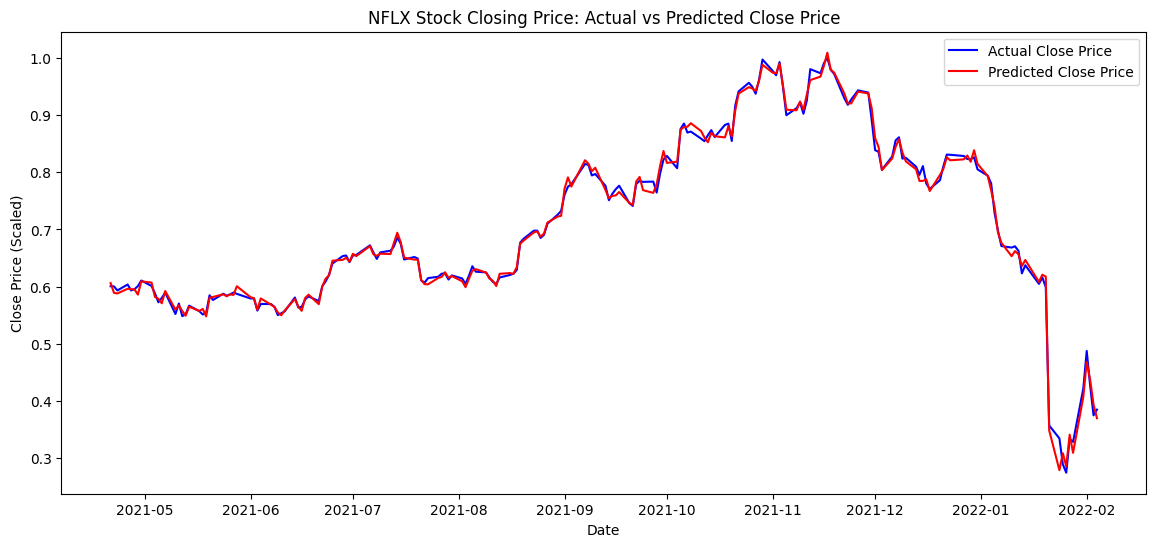

In [43]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, color="blue", label='Actual Close Price')
plt.plot(y_test.index,y_pred, color="red", label='Predicted Close Price')
plt.title('NFLX Stock Closing Price: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (Scaled)')
plt.legend()
plt.show()